In [2]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import datetime, os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-03-01 10:29:17.550984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 10:29:17.648974: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-01 10:29:17.648996: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-01 10:29:18.187224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
train_path = '/home/murali/DeepLearning/dataset/BrainTumour/Training'
test_path = '/home/murali/DeepLearning/dataset/BrainTumour/Testing'

In [4]:
train_datagen = ImageDataGenerator(validation_split=0.2,rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_batches = train_datagen.flow_from_directory(
        train_path,
        target_size=(64, 64),
        batch_size=32,
        subset='training',
        class_mode='categorical')

validation_batches = train_datagen.flow_from_directory(
        train_path,
        target_size=(64, 64),
        batch_size=32,
        subset='validation',
        class_mode='categorical')


test_batches = test_datagen.flow_from_directory(
         test_path,
         target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu' , input_shape=(64,64,3)))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())

#hidden layer 1
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.25))

#hidden layer 2
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.25))

#hidden layer 3
model.add(Dense(32 , activation = 'relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(4 , activation = 'softmax'))

2023-03-01 10:29:21.706182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 10:29:21.706430: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-01 10:29:21.706492: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-01 10:29:21.706562: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-01 10:29:21.706634: W tensorflow/c

In [7]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [8]:
# model compiling
model.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# training model
history= model.fit(x=train_batches,
    validation_data=validation_batches,
    epochs=7,
    verbose=2
)

Epoch 1/7
72/72 - 7s - loss: 1.2746 - accuracy: 0.4057 - val_loss: 1.2186 - val_accuracy: 0.3298 - 7s/epoch - 100ms/step
Epoch 2/7
72/72 - 6s - loss: 0.9416 - accuracy: 0.5973 - val_loss: 1.1296 - val_accuracy: 0.4101 - 6s/epoch - 86ms/step
Epoch 3/7
72/72 - 6s - loss: 0.7624 - accuracy: 0.6670 - val_loss: 1.1256 - val_accuracy: 0.4817 - 6s/epoch - 89ms/step
Epoch 4/7
72/72 - 7s - loss: 0.6559 - accuracy: 0.7231 - val_loss: 1.0173 - val_accuracy: 0.5305 - 7s/epoch - 94ms/step
Epoch 5/7
72/72 - 7s - loss: 0.5356 - accuracy: 0.7719 - val_loss: 0.9995 - val_accuracy: 0.6283 - 7s/epoch - 94ms/step
Epoch 6/7
72/72 - 6s - loss: 0.5014 - accuracy: 0.7989 - val_loss: 0.8831 - val_accuracy: 0.6754 - 6s/epoch - 82ms/step
Epoch 7/7
72/72 - 7s - loss: 0.3989 - accuracy: 0.8346 - val_loss: 1.0420 - val_accuracy: 0.6702 - 7s/epoch - 96ms/step


In [9]:
predictions = model.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)

In [10]:
print(model.evaluate(x=test_batches))

13/13 [==============================] - 2s 128ms/step - loss: 1.9991 - accuracy: 0.5431
[1.9991201162338257, 0.5431472063064575]


In [11]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=1))

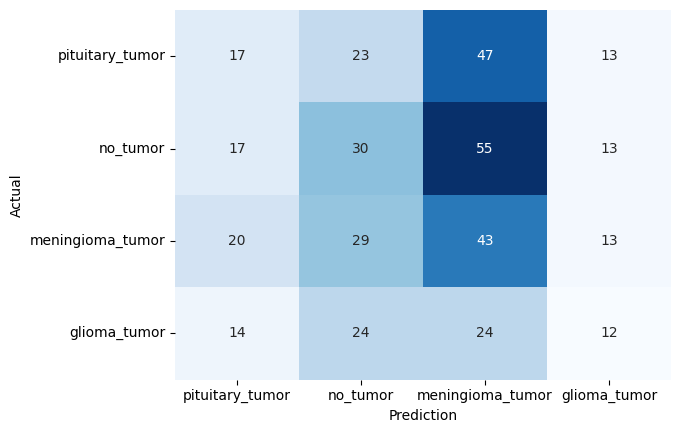

In [12]:
ax = sns.heatmap(cm, annot=True, xticklabels=["pituitary_tumor",'no_tumor',"meningioma_tumor","glioma_tumor"], yticklabels=["pituitary_tumor",'no_tumor',"meningioma_tumor","glioma_tumor"],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()